# Part 1: Load and Explore the Dataset

## Load the Data:
* Import the necessary libraries (pandas for data handling and numpy if needed for numerical operations).
* Load the dataset from the file path you uploaded.
* Display the first few rows of the dataset to understand its structure.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('C:/Users/Adhish/Downloads/insurance.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
display(data.head())

Dataset Preview:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Initial Exploration:
* Check for missing values and data types of each column.
* Get a quick statistical summary of the numerical columns.

In [2]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [3]:
# Check data types of each column
print("\nData Types:")
print(data.dtypes)


Data Types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [4]:
# Get a statistical summary of numerical columns
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# Part 2: Data Cleaning and Preprocessing

## Handle Missing Values:
* Since we’ve checked for missing values in the previous step, after reviewing the output, we see none of the columns have missing data. 
* If they did, we would have had to decide how to handle it (e.g., filling, dropping).

## Encode Categorical Variables:
* The dataset likely contains categorical columns (e.g., sex, smoker, region). To use these features in modeling, we need to convert them into a numerical format.
* We’ll use one-hot encoding for categorical variables to avoid any issues with ordering in the data.

In [5]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the first few rows to verify encoding
print("Encoded Data Preview:")
display(data_encoded.head())

Encoded Data Preview:


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [6]:
# Verify the new structure of the dataset
print("\nDataset Shape After Encoding:", data_encoded.shape)


Dataset Shape After Encoding: (1338, 9)


# Part 3: Exploratory Data Analysis (EDA)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

## Correlation Analysis:
* Calculate the correlation matrix to identify relationships between numerical features (especially with charges, the target variable).
* Plot a heatmap to visually inspect the correlations.

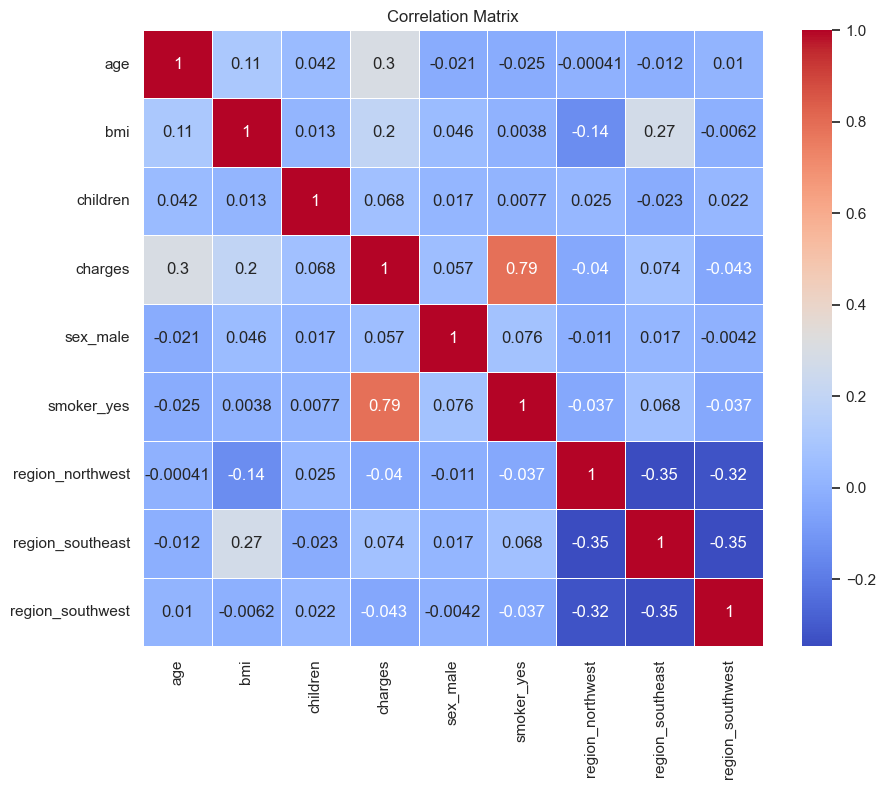

In [8]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Distribution of Target Variable (charges):
* Plot the distribution of charges to understand its range and skewness.

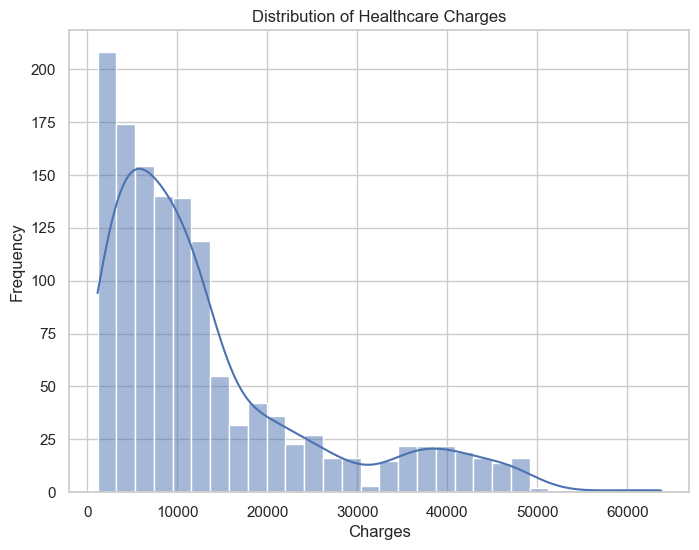

In [9]:
# Distribution of Charges
plt.figure(figsize=(8, 6))
sns.histplot(data_encoded['charges'], bins=30, kde=True)
plt.title("Distribution of Healthcare Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

## Visualize Relationships:
* Plot relationships between charges and key variables (age, bmi, smoker_yes, etc.) to see how these factors impact healthcare costs.

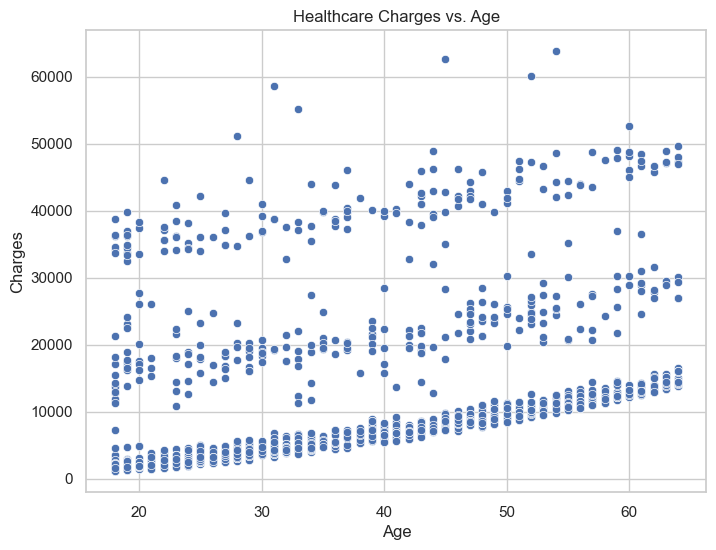

In [10]:
# Relationships with Charges
# Charges vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=data_encoded)
plt.title("Healthcare Charges vs. Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

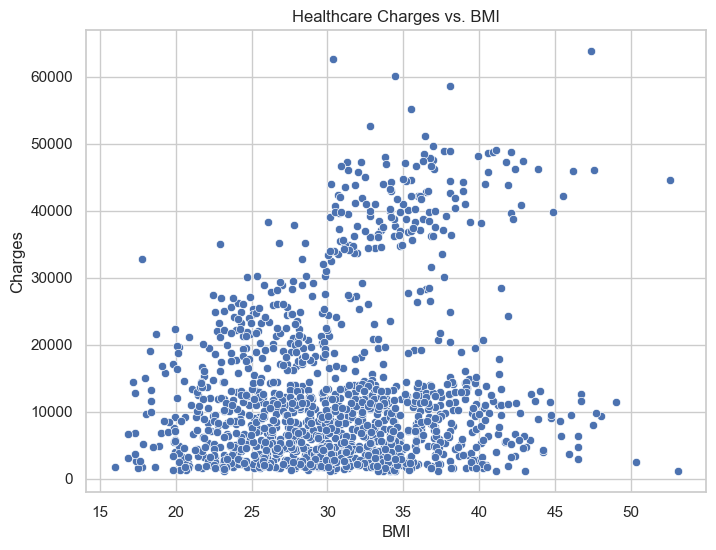

In [11]:
# Charges vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=data_encoded)
plt.title("Healthcare Charges vs. BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

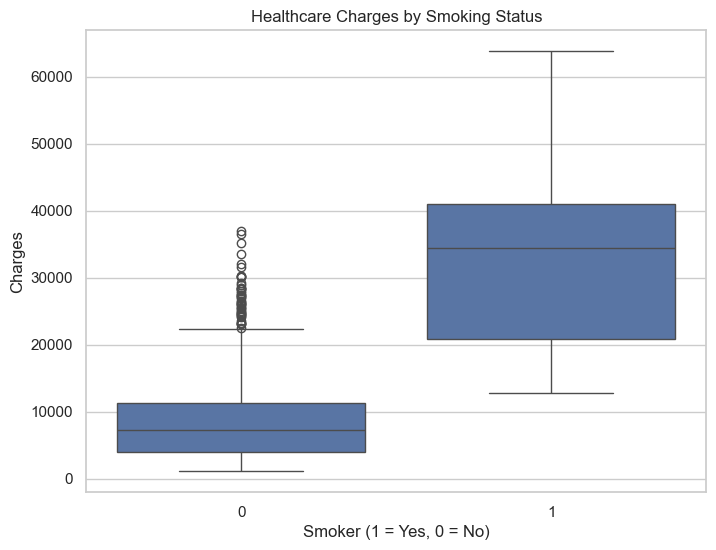

In [12]:
# Charges vs. Smoker
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker_yes', y='charges', data=data_encoded)
plt.title("Healthcare Charges by Smoking Status")
plt.xlabel("Smoker (1 = Yes, 0 = No)")
plt.ylabel("Charges")
plt.show()

# Part 4: Feature Engineering and Model Preparation

## Feature Engineering:
##### Creating any additional features that may improve model performance. For example:
* BMI Categories: Create categories for BMI (e.g., underweight, normal, overweight, obese).
* Age Groups: Bin ages into categories to capture trends based on age ranges (e.g., young, middle-aged, elderly).

## Split the Dataset:
* Split the data into training and testing sets to evaluate model performance.
* Typically, we use an 80-20 or 70-30 split.

## Standardize/Scale Features:
* Standardizing the numerical features (e.g., age, bmi, charges) as needed, especially if using algorithms sensitive to feature scaling (like linear regression or KNN).

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Engineering: Create age and BMI categories
data_encoded['age_group'] = pd.cut(data_encoded['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Elderly'])
data_encoded['bmi_category'] = pd.cut(data_encoded['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Encode the new categorical features
data_encoded = pd.get_dummies(data_encoded, columns=['age_group', 'bmi_category'], drop_first=True)

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make copies of X_train and X_test 
X_train = X_train.copy()
X_test = X_test.copy()

# Standardize the numerical features (using .loc to avoid warnings)
scaler = StandardScaler()
X_train.loc[:, ['age', 'bmi']] = scaler.fit_transform(X_train[['age', 'bmi']])
X_test.loc[:, ['age', 'bmi']] = scaler.transform(X_test[['age', 'bmi']])

print("Feature engineering, data splitting, and scaling complete.")

Feature engineering, data splitting, and scaling complete.


# Part 5: Build and Train the Predictive Model

We are starting with a Linear Regression model as a baseline. Once we evaluate its performance, we will experiment with more advanced models like Random Forest or XGBoost as needed.
## Train a Linear Regression Model:
* Use LinearRegression from scikit-learn to fit the model to the training data.
## Evaluate the Model:
* Predict the healthcare costs for the test data.
* Calculate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared to assess model performance.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 4305.2781706123105
Mean Squared Error (MSE): 33842816.2840524
R-squared (R2): 0.7820090640428472


# Part 6: Experiment with Additional Models

To improve accuracy, let’s try more advanced models. We’ll start with Random Forest Regressor and XGBoost Regressor. Both models can capture non-linear relationships, which might improve our predictions.
## Random Forest Regressor:
* A powerful ensemble model that can handle complex data patterns.
## XGBoost Regressor:
* A gradient boosting model known for high performance in regression tasks.

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2): {r2_rf}")

Random Forest Model Performance:
Mean Absolute Error (MAE): 2559.7733710856965
Mean Squared Error (MSE): 20968823.95731417
R-squared (R2): 0.8649340077962229


In [16]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R-squared (R2): {r2_xgb}")


XGBoost Model Performance:
Mean Absolute Error (MAE): 2775.5145944588394
Mean Squared Error (MSE): 24440837.13803033
R-squared (R2): 0.8425698110175835


# Part 7: Model Evaluation and Comparison

Since we’ve trained multiple models (Linear Regression, Random Forest, and XGBoost), let’s compare their performance to select the best one. This will help us decide which model to use for further analysis and interpretation.
## Performance Comparison Table:
* Summarize each model’s Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) in a table for easy comparison.
## Residual Analysis:
* Plot the residuals (difference between actual and predicted values) for each model to see if there are any noticeable patterns.
* Ideally, randomly distributed residuals indicates a good fit.

In [17]:
# Create a DataFrame to compare model performance
performance_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [mae, mae_rf, mae_xgb],
    "MSE": [mse, mse_rf, mse_xgb],
    "R-squared": [r2, r2_rf, r2_xgb]
})

print("Model Performance Comparison:")
display(performance_df)

# Residual Analysis - Plotting residuals for each model
import matplotlib.pyplot as plt

Model Performance Comparison:


,Model,MAE,MSE,R-squared
0,Linear Regression,4305.278171,3.384282e+07,0.782009
1,Random Forest,2559.773371,2.096882e+07,0.864934
2,XGBoost,2775.514594,2.444084e+07,0.842570


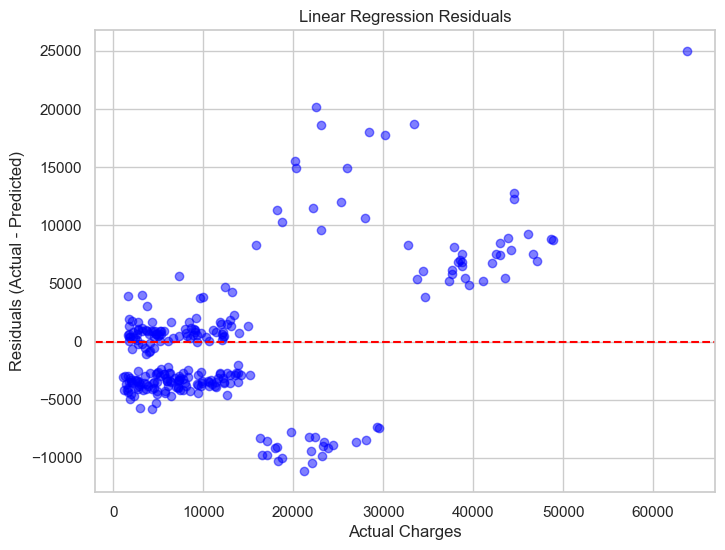

In [18]:
# Linear Regression Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_pred, color="blue", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Linear Regression Residuals")
plt.show()

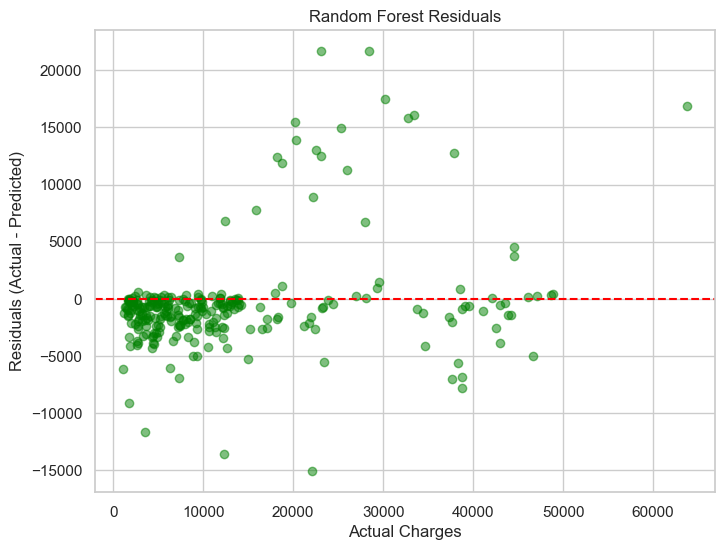

In [19]:
# Random Forest Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_pred_rf, color="green", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Random Forest Residuals")
plt.show()

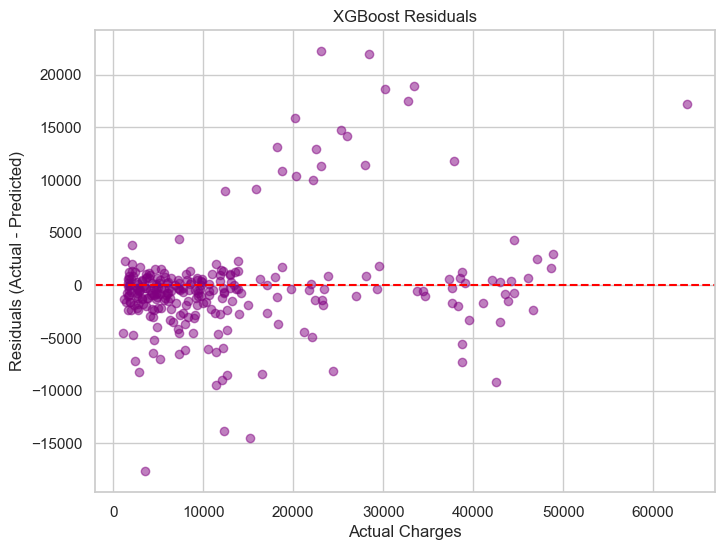

In [20]:
# XGBoost Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_pred_xgb, color="purple", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("XGBoost Residuals")
plt.show()

# Part 8: Feature Importance Analysis

For feature importance, we’ll use the following methods based on the chosen model:
## Random Forest and XGBoost Feature Importance:
* Both Random Forest and XGBoost have built-in feature importance attributes. We can extract and visualize them to understand which features are most influential.
## SHAP Values:
* SHAP (SHapley Additive exPlanations) values offer a more detailed, interpretable explanation of feature importance. This method can be used for models like XGBoost and Random Forest to show the effect of each feature on predictions.

#### Feature Importance with Random Forest and XGBoost

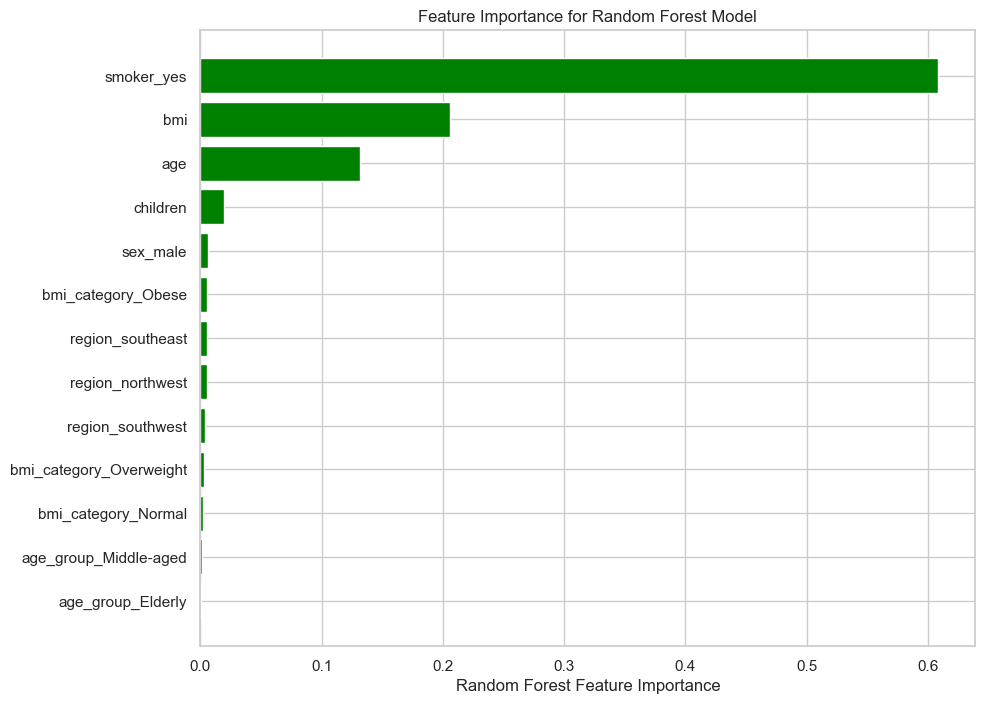

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Random Forest is the best model for example purposes
# Feature importance for Random Forest
feature_importance_rf = rf_model.feature_importances_
sorted_idx_rf = np.argsort(feature_importance_rf)

plt.figure(figsize=(10, 8))
plt.barh(X_train.columns[sorted_idx_rf], feature_importance_rf[sorted_idx_rf], color="green")
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Model")
plt.show()

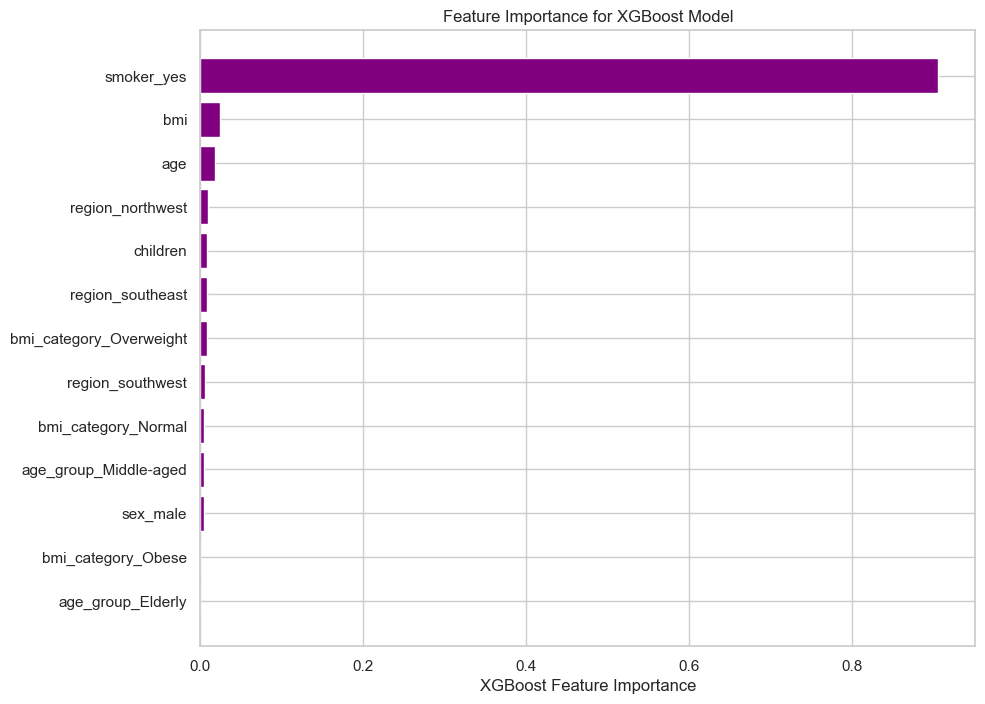

In [22]:
# Feature importance for XGBoost (if XGBoost is the best model)
feature_importance_xgb = xgb_model.feature_importances_
sorted_idx_xgb = np.argsort(feature_importance_xgb)

plt.figure(figsize=(10, 8))
plt.barh(X_train.columns[sorted_idx_xgb], feature_importance_xgb[sorted_idx_xgb], color="purple")
plt.xlabel("XGBoost Feature Importance")
plt.title("Feature Importance for XGBoost Model")
plt.show()

### SHAP Values for More Detailed Analysis

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


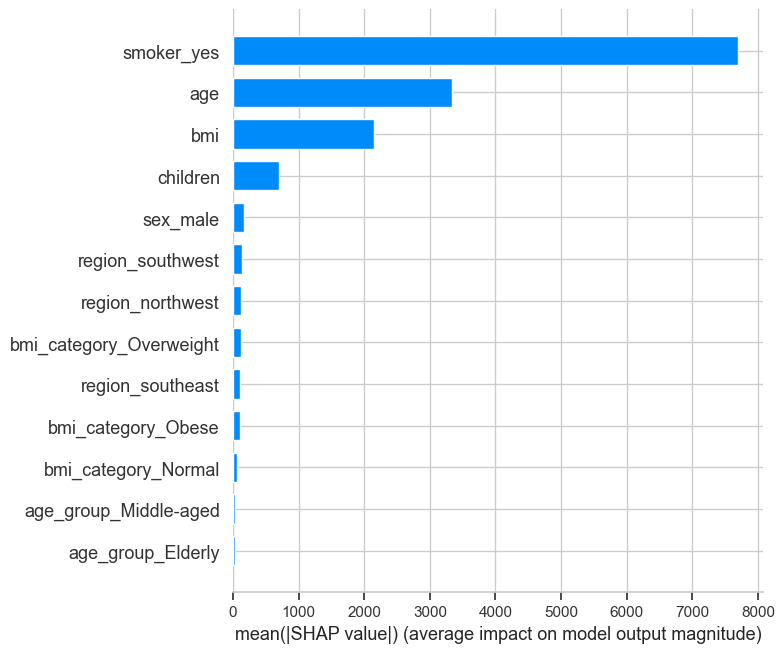

In [23]:
import shap

# Initialize the SHAP explainer
# Use the best model you identified (either rf_model or xgb_model)
# Replace `best_model` with the model you selected as best
best_model = rf_model  # or xgb_model, depending on which performed better

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# PART 9: Advanced Segmentation and Personalization

Here, we'll perform clustering to segment patients into distinct groups based on their characteristics. This allows for personalized recommendations tailored to each group's specific needs.

### 9.1 Select Features for Clustering

Choose relevant features that can influence healthcare costs for clustering.

In [24]:
# Select features for clustering
clustering_features = ['age', 'bmi', 'smoker_yes', 'children']

# Create a DataFrame with the selected features
X_clustering = data_encoded[clustering_features]

### 9.2 Standardize the Features

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

### 9.3 Determine Optimal Number of Clusters

Using the Elbow Method and Silhouette Score to find the optimal number of clusters.

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
The default value of `n_init` will change from 10 to 'auto' in 1.4.

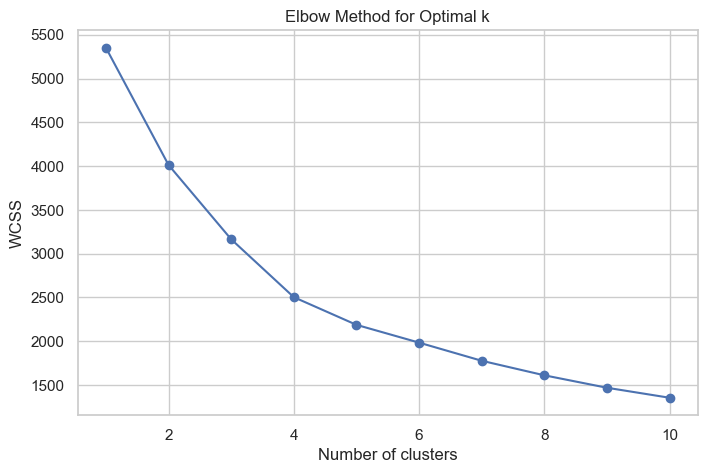

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_clustering_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
The default value of `n_init` will change from 10 to 'auto' in 1.4.

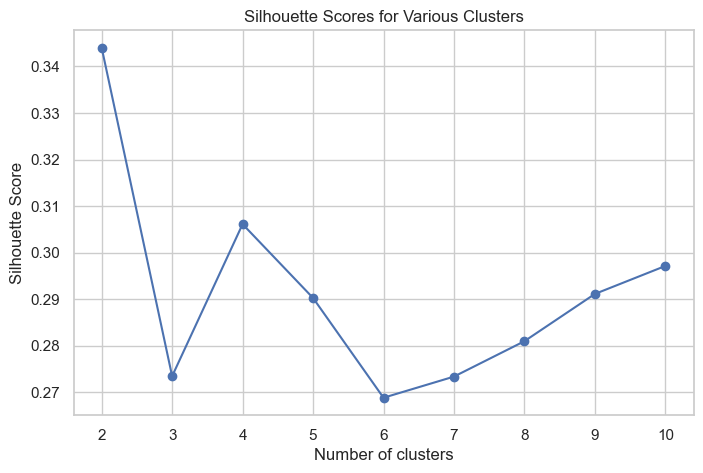

In [27]:
from sklearn.metrics import silhouette_score

# Silhouette Scores
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_clustering_scaled)
    score = silhouette_score(X_clustering_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

*DECISION*: Based on the plots, we have choosen the number of clusters where the elbow occurs or the silhouette score is maximized, that is k = 2.

### 9.4 Apply K-Means Clustering

In [28]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_clustering_scaled)

# Add cluster labels to the original data
data_encoded['Cluster'] = clusters

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.


### 9.5 Analyze the Clusters

In [29]:
# Analyze cluster characteristics
cluster_profiles = data_encoded.groupby('Cluster')[clustering_features + ['charges']].mean()
print(cluster_profiles)

               age        bmi  smoker_yes  children       charges
Cluster                                                          
0        38.514599  30.708449           1  1.113139  32050.231832
1        39.385338  30.651795           0  1.090226   8434.268298


### 9.6 Interpretation and Recommendations

**Cluster 0** represents individuals who are likely smokers and have significantly higher healthcare costs. The high average charges suggest that smoking is a major driver of healthcare expenses for this group.
**RECOMMENDATION**: Implement targeted programs for smoking cessation to help reduce costs for individuals in this cluster.

**Cluster 1** represents individuals who are likely non-smokers and have relatively low healthcare charges.
**Recommendation**: Encourage maintaining current health habits for this group. Consider preventive measures or wellness programs to help keep healthcare costs low.

# PART 10: Predictive and Prescriptive Analytics

Here, we'll simulate how changes in certain behaviors (e.g., quitting smoking, reducing BMI) can lead to cost savings.

### 10.1 Simulate Smoking Cessation Impact

In [30]:
# Create a copy of the data for simulation
data_simulation = data_encoded.copy()

# Simulate smokers quitting smoking
data_simulation['smoker_yes'] = data_simulation['smoker_yes'].apply(lambda x: 0)

# Predict costs before and after quitting smoking
original_costs = best_model.predict(data_encoded[X_train.columns])
simulated_costs = best_model.predict(data_simulation[X_train.columns])

# Calculate potential savings
data_encoded['Predicted_Cost'] = original_costs
data_simulation['Predicted_Cost'] = simulated_costs
data_encoded['Savings'] = data_encoded['Predicted_Cost'] - data_simulation['Predicted_Cost']

# Average potential savings
average_savings = data_encoded['Savings'].mean()
print(f"Average potential savings after quitting smoking: ${average_savings:.2f}")

Average potential savings after quitting smoking: $6455.56


### 10.2 Simulate BMI Reduction Impact

In [31]:
# Simulate BMI reduction by 5%
data_simulation_bmi = data_encoded.copy()
data_simulation_bmi['bmi'] = data_simulation_bmi['bmi'] * 0.95

# Standardize the BMI feature
data_simulation_bmi[['age', 'bmi']] = scaler.transform(data_simulation_bmi[['age', 'bmi']])

# Predict costs before and after BMI reduction
simulated_costs_bmi = best_model.predict(data_simulation_bmi[X_train.columns])

# Calculate potential savings
data_encoded['Savings_BMI'] = data_encoded['Predicted_Cost'] - simulated_costs_bmi

# Average potential savings
average_savings_bmi = data_encoded['Savings_BMI'].mean()
print(f"Average potential savings after reducing BMI by 5%: ${average_savings_bmi:.2f}")

Average potential savings after reducing BMI by 5%: $9677.86


# PART 11: Anomaly Detection for Unusual Healthcare Costs

Identify patients whose healthcare costs are unusually high or low compared to their profiles.

### 11.1 Apply Isolation Forest

In [32]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model on training data
iso_forest.fit(X_train)

# Predict anomalies on test data
anomaly_labels = iso_forest.predict(X_test)

# Add anomaly labels to test data
X_test['Anomaly'] = anomaly_labels
y_test_reset = y_test.reset_index(drop=True)
X_test['Actual_Charges'] = y_test_reset

# Extract anomalies
anomalies = X_test[X_test['Anomaly'] == -1]
print(f"Number of anomalies detected: {anomalies.shape[0]}")

Number of anomalies detected: 21


### 11.2 Analyze Anomalies

In [33]:
# Examine the anomalies
anomalies.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_Middle-aged,age_group_Elderly,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,Anomaly,Actual_Charges
890,1.751782,-0.608453,0,0,1,1,0,0,0,1,0,1,0,-1,NaN
780,-0.665156,-1.019839,3,1,1,0,0,1,0,0,1,0,0,-1,NaN
1176,0.898745,-1.064536,1,0,1,1,0,0,0,1,1,0,0,-1,NaN
32,-1.447107,-0.324539,5,0,0,0,0,1,0,0,0,1,0,-1,2020.5523
494,-1.304934,-0.804627,4,1,1,0,0,1,0,0,0,1,0,-1,NaN


In [34]:
# Compare actual charges with predicted charges
anomalies.loc[:, 'Predicted_Charges'] = best_model.predict(anomalies[X_train.columns])

# Calculate the difference
anomalies.loc[:, 'Charge_Difference'] = anomalies['Actual_Charges'] - anomalies['Predicted_Charges']

# Analyze the discrepancies
display(anomalies[['Actual_Charges', 'Predicted_Charges', 'Charge_Difference']])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Actual_Charges,Predicted_Charges,Charge_Difference
890,NaN,28374.461679,NaN
780,NaN,19809.498575,NaN
1176,NaN,23971.424200,NaN
32,2020.5523,6327.324437,-4306.772137
494,NaN,17414.990842,NaN
289,NaN,14728.812335,NaN
664,NaN,26789.534853,NaN
1314,NaN,17659.591324,NaN
793,NaN,23540.422454,NaN
58,11848.1410,24039.387351,-12191.246351


# PART 12: Visualizations in Python

### 12.1 Cluster Profiles Visualization

#### 1. Bar Plot of Average Charges per Cluster

This plot will show the average healthcare charges for each cluster, highlighting cost differences.

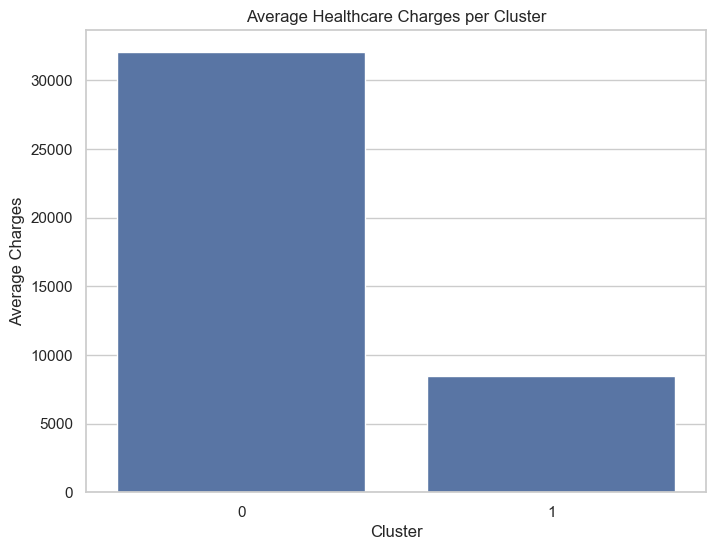

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average charges per cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_profiles.index, y=cluster_profiles['charges'])
plt.title("Average Healthcare Charges per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Charges")
plt.show()

#### 2. Radar Chart for Cluster Characteristics

The radar chart is helpful for visualizing the characteristics of each cluster, like age, BMI, smoker status, and number of children.

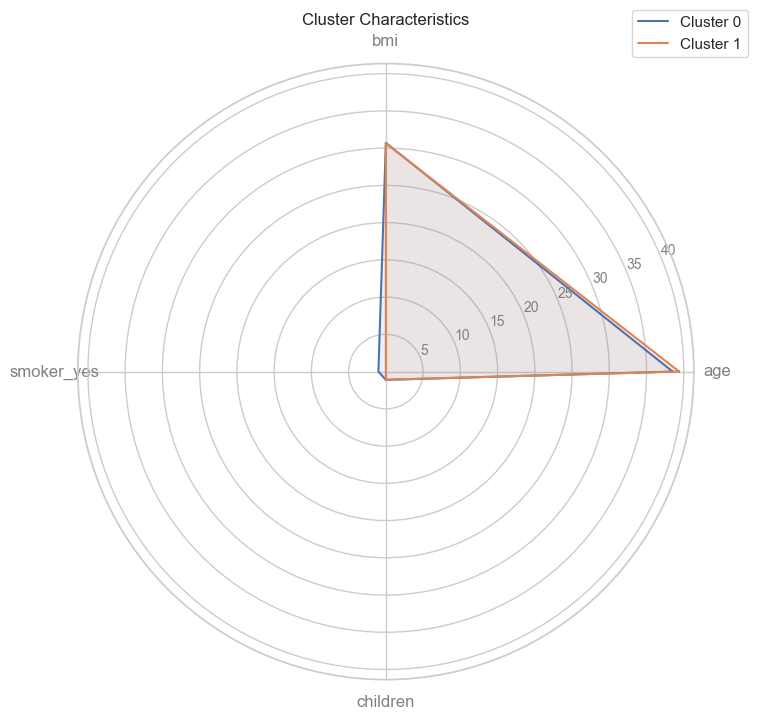

In [36]:
from math import pi

# Prepare data for radar chart
categories = ['age', 'bmi', 'smoker_yes', 'children']
N = len(categories)

# Add each cluster's data to a list
values_cluster_0 = cluster_profiles.loc[0, categories].values.flatten().tolist()
values_cluster_1 = cluster_profiles.loc[1, categories].values.flatten().tolist()

# Complete the loop for radar chart
values_cluster_0 += values_cluster_0[:1]
values_cluster_1 += values_cluster_1[:1]

# Set up the radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot each cluster
ax.plot(angles, values_cluster_0, label="Cluster 0")
ax.fill(angles, values_cluster_0, alpha=0.1)

ax.plot(angles, values_cluster_1, label="Cluster 1")
ax.fill(angles, values_cluster_1, alpha=0.1)

# Add labels
plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(color="grey", size=10)
plt.title("Cluster Characteristics")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

### 12.2 Prescriptive Analytics Visualization

#### 1. Before-and-After Cost Comparison for Smoking Cessation

This bar chart will show the average predicted costs before and after quitting smoking.

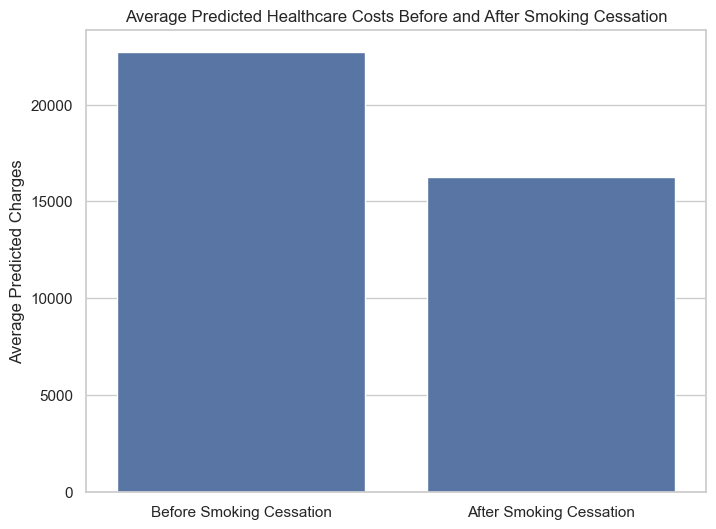

In [37]:
# Calculate average predicted costs before and after quitting smoking
average_cost_before = data_encoded['Predicted_Cost'].mean()
average_cost_after = data_simulation['Predicted_Cost'].mean()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Smoking Cessation', 'After Smoking Cessation'], y=[average_cost_before, average_cost_after])
plt.title("Average Predicted Healthcare Costs Before and After Smoking Cessation")
plt.ylabel("Average Predicted Charges")
plt.show()

#### 2. Before-and-After Cost Comparison for BMI Reduction

This bar chart will show the average predicted costs before and after a 5% reduction in BMI.

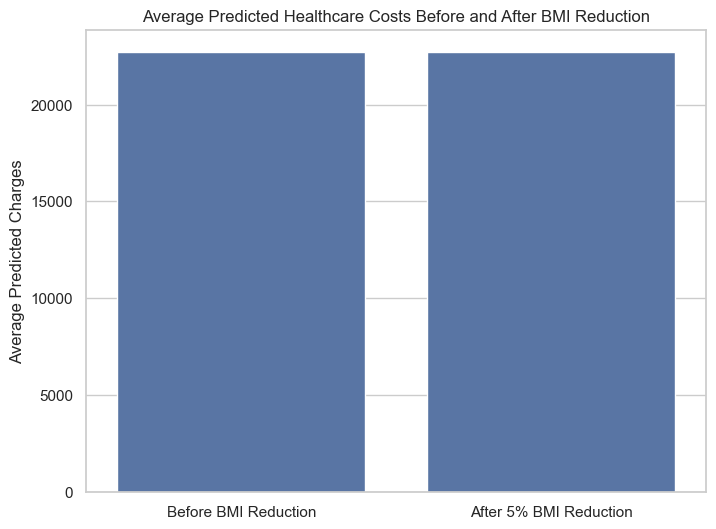

In [38]:
# Calculate average predicted costs before and after BMI reduction
average_cost_before_bmi = data_encoded['Predicted_Cost'].mean()
average_cost_after_bmi = data_simulation_bmi['Predicted_Cost'].mean()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before BMI Reduction', 'After 5% BMI Reduction'], y=[average_cost_before_bmi, average_cost_after_bmi])
plt.title("Average Predicted Healthcare Costs Before and After BMI Reduction")
plt.ylabel("Average Predicted Charges")
plt.show()

### 12.3 Anomaly Detection Visualization

#### 1. Scatter Plot of Actual vs Predicted Charges for Anomalies

This plot will highlight anomalies by showing the difference between actual and predicted charges.

In [39]:
# Convert y_test to a DataFrame and reset its index to align with X_test
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_test_df.columns = ['Actual_Charges']

# Add Actual_Charges to X_test
X_test['Actual_Charges'] = y_test_df['Actual_Charges']

# Predict charges for X_test and add Predicted_Charges
X_test['Predicted_Charges'] = best_model.predict(X_test[X_train.columns])

In [40]:
# Separate anomalies and regular data

anomalies = X_test[X_test['Anomaly'] == -1]
regular_data = X_test[X_test['Anomaly'] == 1]

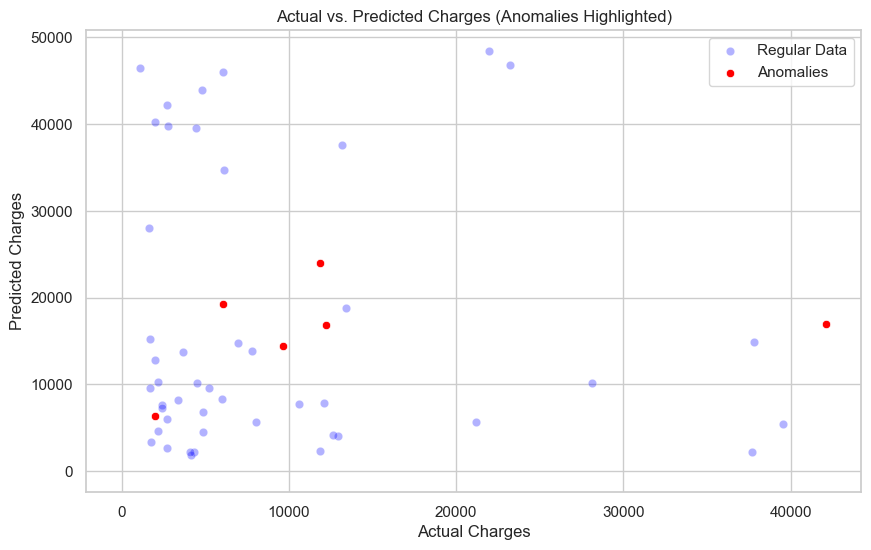

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for actual vs. predicted charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Charges', y='Predicted_Charges', data=regular_data, color='blue', alpha=0.3, label="Regular Data")
sns.scatterplot(x='Actual_Charges', y='Predicted_Charges', data=anomalies, color='red', label="Anomalies")
plt.plot([0, max(X_test['Actual_Charges'])], [0, max(X_test['Actual_Charges'])], 'k--', lw=2)  # Diagonal line for reference
plt.title("Actual vs. Predicted Charges (Anomalies Highlighted)")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.show()

#### 2. Bar Plot for Charge Differences in Anomalies

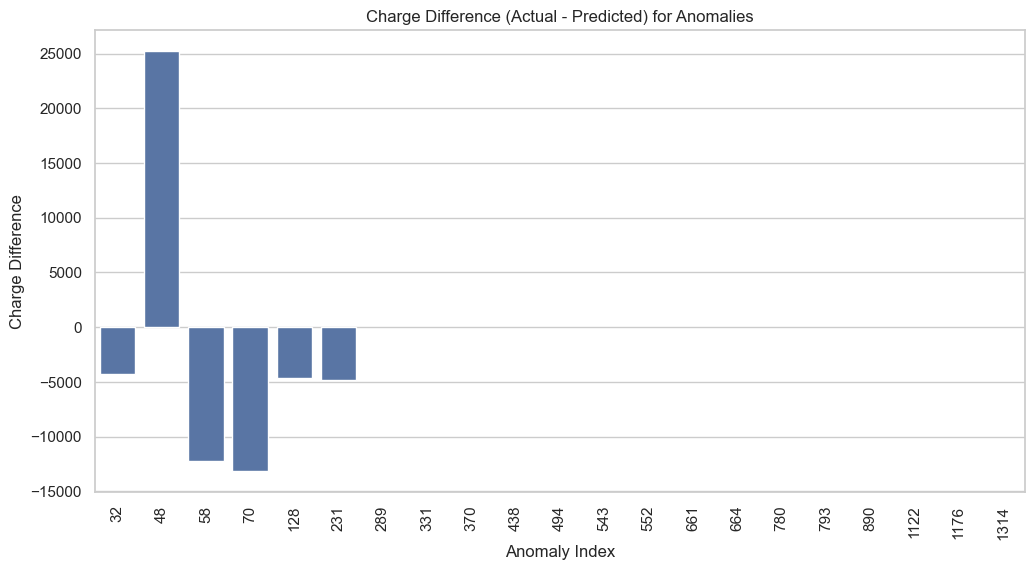

In [42]:
# Bar plot of charge differences for anomalies
# Create a copy of anomalies
anomalies = anomalies.copy()

# Calculate the charge difference for anomalies
anomalies['Charge_Difference'] = anomalies['Actual_Charges'] - anomalies['Predicted_Charges']

# Sort anomalies by the absolute value of the charge difference for better visualization
anomalies_sorted = anomalies.reindex(anomalies['Charge_Difference'].abs().sort_values(ascending=False).index)

# Bar plot of charge differences for anomalies
plt.figure(figsize=(12, 6))
sns.barplot(x=anomalies_sorted.index, y=anomalies_sorted['Charge_Difference'])
plt.title("Charge Difference (Actual - Predicted) for Anomalies")
plt.xlabel("Anomaly Index")
plt.ylabel("Charge Difference")
plt.xticks(rotation=90)
plt.show()